[0.1        0.10061505 0.10123389 0.10185653 0.102483   0.10311333
 0.10374753 0.10438563 0.10502766 0.10567364 0.10632359 0.10697753
 0.1076355  0.10829752 0.10896361 0.10963379 0.1103081  0.11098655
 0.11166918 0.112356   0.11304705 0.11374235 0.11444193 0.11514581
 0.11585402 0.11656658 0.11728353 0.11800488 0.11873068 0.11946093
 0.12019568 0.12093495 0.12167877 0.12242716 0.12318015 0.12393777
 0.12470006 0.12546703 0.12623872 0.12701515 0.12779636 0.12858238
 0.12937323 0.13016894 0.13096955 0.13177509 0.13258557 0.13340105
 0.13422153 0.13504707 0.13587768 0.1367134  0.13755426 0.13840029
 0.13925153 0.140108   0.14096974 0.14183678 0.14270915 0.14358689
 0.14447002 0.14535859 0.14625262 0.14715216 0.14805722 0.14896785
 0.14988408 0.15080595 0.15173349 0.15266673 0.15360571 0.15455047
 0.15550104 0.15645745 0.15741975 0.15838797 0.15936214 0.1603423
 0.16132849 0.16232075 0.1633191  0.1643236  0.16533428 0.16635118
 0.16737433 0.16840377 0.16943954 0.17048168 0.17153024 0.17258

Text(0, 0.5, 'y')

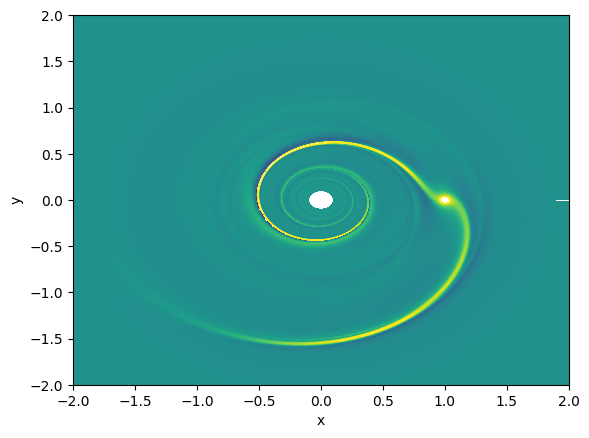

In [13]:
# python libraries
import os
import math
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline


n2 = 200 # file number is the number of time steps
nr = 638  # the radial grid in circular.par
ntheta = 1024 # the azimuthal grid number in circular.par

os.chdir("/Users/RaymondMZhang/Regeneron/fargo/out2circular")
# density
rho = fromfile("gasdens{0:d}.dat".format(n2), dtype='float64').reshape(nr, ntheta) 
# for single precision
# rho = fromfile("gasdens{0:d}.dat".format(n2), dtype='float32').reshape(nr, ntheta)
rho = np.transpose(rho)

file = open('used_rad.dat', 'r')
planet = open('planet0.dat', 'r')


# create an array of all the radii
rad = []
for line in file: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    columns = line.split() # Split the string into many columns
    rad = np.append(rad, float(columns[0])) # convert the column into floating numbers
    

for line in planet: # Loop through every line in the file
    line = line.strip() # The strip() removes characters from both left and right 
    arr = line.split() # Split the string into many columns]
    arr = np.array(arr)
    arr = arr.astype(float)
    if arr[0] == n2:
        planetx = arr[1]
        planety = arr[2]

rad = (rad[1:] + rad[0:-1]) / 2. # change cell edge to cell center
theta = np.arange(0.0,2. * np.pi,2. * np.pi / ntheta)
radarr, thetaarr = np.meshgrid(rad,theta)

zmin = 0.995
zmax = 1.005
levels = np.linspace(zmin, zmax, 200)
xcoord = radarr * np.cos(thetaarr)
ycoord = radarr * np.sin(thetaarr)
plt.contourf(xcoord, ycoord, rho, levels = levels)
plt.xlim([-2,2])
plt.xlabel('x')
plt.ylim([-2,2])
plt.ylabel('y')